## Neural Network Regression with Tensorflow

In [1]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.5.0


### Create Data to view & fit

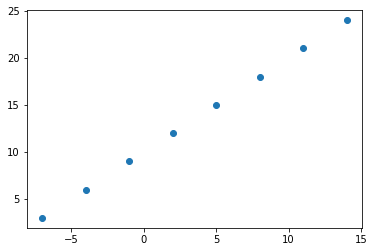

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) #features
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])  # labels


plt.scatter(X,y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input & Output Shapes

In [4]:
# create a demo tensor for our housing price pred problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X = tf.constant(X)
y = tf.constant(y)
print(X, y)
X[0].shape, y[0].shape

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float64) tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float64)


(TensorShape([]), TensorShape([]))

# Steps in modelling with tensorflow

1. Create a model - define input, hidden and output layers
2. Compile a model - define loss func and optimiser and eval metrics
3. Fitting a model - let model find patterns between X & y (i.e. features & labels)

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X, y, epochs=10)

# make a prediction on y using our model
model.predict([17.0])

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 10.3123 - mae: 10.3123


array([[15.741023]], dtype=float32)

# Improving our model

In [8]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
model.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 391ms/step - loss: 13.3031 - mae: 13.3031
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4021 - mae: 10.4021
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5497 - mae: 7.5497
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 3.9338 - mae: 3.9338
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9997 - mae: 6.9997
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8829 - mae: 6.8829
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 5.1424 - mae: 5.1424
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 3.8512 - mae: 3.8512
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 4.7630 - mae: 4.7630
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 5.3790 - mae: 5.3790
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 5

In [9]:
model.predict([17.0])
# likely overfitting here

array([[24.910383]], dtype=float32)

# Evaluating a model

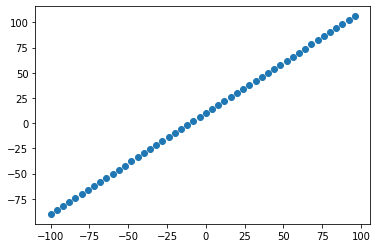

In [10]:
X = tf.range(-100, 100,4) # make a bigger dataset
y = X +10 # make labels
plt.scatter(X, y)

In [11]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

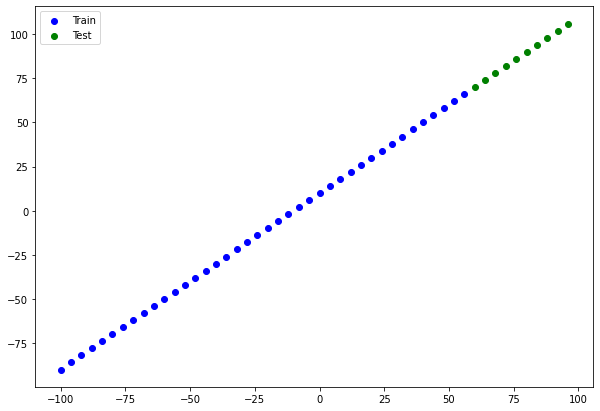

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Train")
plt.scatter(X_test, y_test, c="g", label="Test")
plt.legend()
plt.show()

In [14]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer="sgd",
              metrics=["mae"])

#model.fit(X_train, y_train, epochs=100)
model.summary()

ValueError: ignored

In [15]:
# create a model which builds automatically by defining an input shape arg
tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=([1]), name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
  ], name="model_one")

model.compile(loss="mae",
              optimizer="sgd",
              metrics=["mae"])

model.summary()
model.fit(X_train, y_train, epochs=100, verbose=0)

Model: "model_one"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


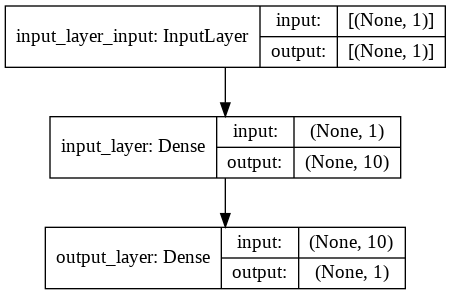

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualising our model's predictions

In [17]:
# compare our predictions (y_pred) against ground truth (y_test)
y_pred = model.predict(X_test)

In [18]:
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test, predictions=y_pred):
  """
  Plots training and test data and compares against ground truth labels
  """

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="training_data")
  plt.scatter(test_data, test_labels, c="g", label="testing_data")
  plt.scatter(test_data, predictions, c="r", label="predictions_data")
  plt.legend();
  return

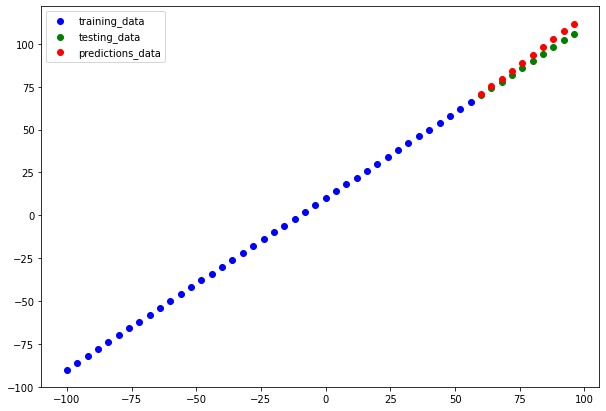

In [19]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

In [20]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 110ms/step - loss: 3.1969 - mae: 3.1969


[3.196946620941162, 3.196946620941162]

In [21]:
# call mae w/o using the evaluate function
mae = tf.metrics.mean_absolute_error(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558247, 14.116051, 11.708944, 10.336927, 10.      , 10.698161,
       12.447118, 15.333008, 19.253975, 23.841705], dtype=float32)>

In [22]:
# tensors must be of same shape
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>

In [23]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070175>

In [24]:
def mae(y_true=y_test, y_pred=y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))
  
def mse(y_true=y_test, y_pred=y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

### Running experiments to improve our model

In [25]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [26]:
# model_1 - same as og model, 1 layer trained for 100 epochs
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                   
], name="model_1")

model_1.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

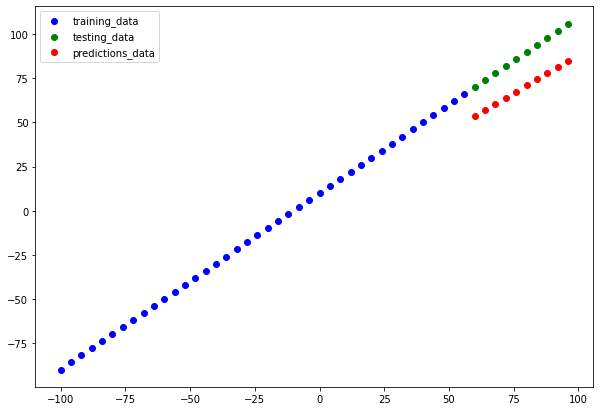

In [27]:
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [28]:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

In [29]:
# model_2 - 2 layers, trained for 100 epochs
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
], name="model_2")

model_2.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 7ms/

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070175>)

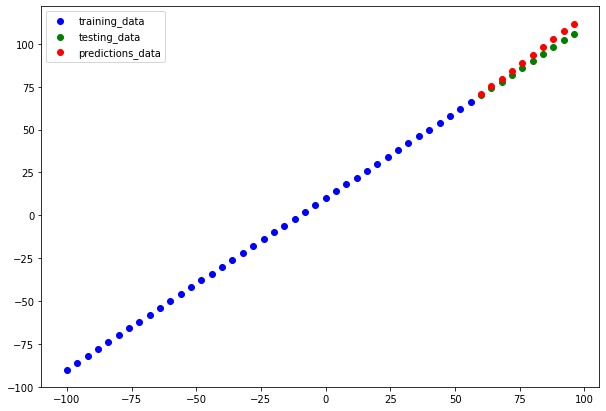

In [30]:
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

In [31]:
# model_3 - 2 layers, trained for 500 epochs
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
], name="model_3")

model_3.compile(optimizer="sgd",
              loss="mae",
              metrics=["mae"])
model_3.fit(X_train, y_train, epochs=500, verbose=0)

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0283>)

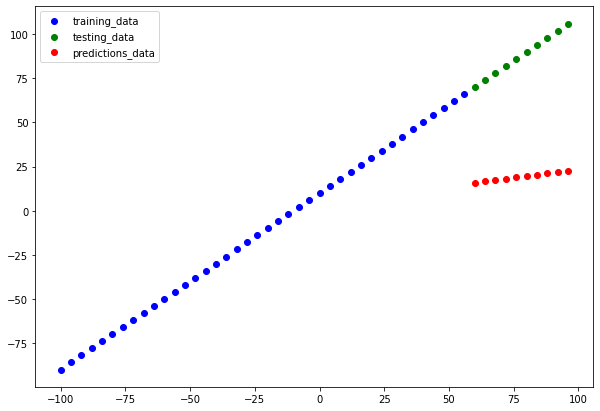

In [32]:
# now overfitting
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

### Comparing our results of our experiments

In [33]:
import pandas as pd

In [34]:
model_results =[["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.196947,13.070175
2,model_3,68.713623,4808.028320


In [35]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Tracking your experiments
* TensorBoard - a component of the TensorFlow library to help track modelling experiements
* Weights & Biases - a tool for tracking all kinds of ml experiments (plugs directly into TensorBoard)


### Saving our models

2 main formats to save our models too:
  1. The SavedModel format
  2. The HDF5 format

In [36]:
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [37]:
model_2.save("best_moded_HDF5_format.h5")

### Loading in saved models

In [38]:
loaded_SavedModel_format=tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [39]:
# compare model_2 predictions with savedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [40]:
loaded_h5_model = tf.keras.models.load_model("/content/best_moded_HDF5_format.h5")
loaded_h5_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [41]:
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_SavedModel_format_preds == model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A Larger Example

In [42]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [44]:
# one hot encode pandas df
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [45]:
y = insurance_one_hot["charges"]
X = insurance_one_hot.drop("charges", axis=1)
X.head(), y.head()

(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [47]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                          
], name='insurance_model')

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer="sgd",
                        metrics=["mae"])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5586 - mae: 7698.5586
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7773 - mae: 7496.7773
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1738 - mae: 7493.1738

In [48]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [49]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

To try improve our model we'll run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer

In [50]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
], name="insurance_model_2")

insurance_model_2.compile(loss="mae",
                          optimizer="adam",
                          metrics=["mae"])
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
34/34 - 0s - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 - 0s - loss: 13104.4287 - mae: 13104.4287
Epoch 3/100
34/34 - 0s - loss: 12749.5400 - mae: 12749.5400
Epoch 4/100
34/34 - 0s - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 - 0s - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 - 0s - loss: 9457.7188 - mae: 9457.7188
Epoch 7/100
34/34 - 0s - loss: 8147.6533 - mae: 8147.6533
Epoch 8/100
34/34 - 0s - loss: 7528.8398 - mae: 7528.8398
Epoch 9/100
34/34 - 0s - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 - 0s - loss: 7409.0811 - mae: 7409.0811
Epoch 11/100
34/34 - 0s - loss: 7390.8042 - mae: 7390.8042
Epoch 12/100
34/34 - 0s - loss: 7368.9170 - mae: 7368.9170
Epoch 13/100
34/34 - 0s - loss: 7348.5195 - mae: 7348.5195
Epoch 14/100
34/34 - 0s - loss: 7326.4893 - mae: 7326.4893
Epoch 15/100
34/34 - 0s - loss: 7307.5811 - mae: 7307.5811
Epoch 16/100
34/34 - 0s - loss: 7285.7739 - mae: 7285.7739
Epoch 17/100
34/34 - 0s - loss: 7265.7104 - mae: 7265.7

In [51]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

In [52]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
], name="insurance_model_3")

insurance_model_3.compile(loss="mae",
                          optimizer="adam",
                          metrics=["mae"])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history = insurance_model_3.fit(X_train, y_train, epochs=1000, callbacks=[callback], verbose=0)

In [53]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3175.1074 - mae: 3175.1074


[3175.107421875, 3175.107421875]

Text(0.5, 0, 'epochs')

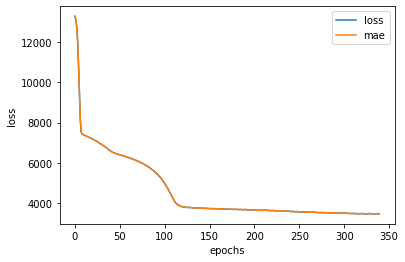

In [54]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalisation and standardisation)

In [55]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [56]:
# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit column transformer to training data only
# CAN NOT USE THE COMBINE VALUE AS THIS WOULD LEAD TO MODEL LEAKAGE
ct.fit(X_train)

# transform trianing and test data with normalisation and one hot encoding
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [57]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss="mae",
                          optimizer="adam",
                          metrics=["mae"])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

insurance_model_4.fit(X_train_normal, y_train, callbacks=[callback], epochs=1000, verbose=0)

insurance_model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [58]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.0137 - mae: 3161.0137


[3161.013671875, 3161.013671875]

In [70]:
# logging test

tf.random.set_seed(42)

insurance_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_5.compile(loss="mae",
                          optimizer="adam",
                          metrics=["mae"])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
log = tf.keras.callbacks.BaseLogger('training.log', separator=",", append=False)


insurance_model_5.fit(X_train_normal, y_train, callbacks=[log, early_stop], epochs=100, verbose=1)

with open('modelsummary.txt', 'w') as f:
  insurance_model_5.summary(print_fn=lambda x: f.write(x + '\n'))

#insurance_model_5.summary(print_fn=logger.info)
insurance_model_5.evaluate(X_test_normal, y_test)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4795 - mae: 13333.4795
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4482 - mae: 13066.4482
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

[3438.784423828125, 3438.784423828125]